"Sunny Nurseries" have had a customer inquiry about their Iris plants that they sell. The customer wishes to know how what is the average size of petals on the three different species that "Sunny Nurseries" sells.

I have had the task to find out from a sample population to find out the size orders from large to small. 
I will do an analysis of the data provided and present my findings to the customer.

In [9]:
# I will import the dataset and import relevant packages to help with my research
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs
import seaborn as sns 
from scipy.stats import norm,t

df_iris = pd.read_csv('..\StatistiskaMetoder\data\iris.csv') # dataset

In [10]:
# Showing the top 3 lines of the dataframe
df_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [11]:
# Here is what information is provided in the data set
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sepal_length   150 non-null    float64
 1    sepal_width   150 non-null    float64
 2    petal_length  150 non-null    float64
 3    petal_width   150 non-null    float64
 4    class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
# This shows the unique elements of the column class
df_iris[' class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

We can see here that there is 5 different columns containing information of the type(class), sepal length, sepal width, petal length and petal width. There are 150 rows of data.

I will now divide the data set into the relevant 3 species and calculate an extra column that will give the area of each petal.

This will enable me to do further research into the different sizes of petals for the customer.

In [16]:
# I will multiply the petal length by the petal width to get an
# area of the petal.

df_iris["petal_area"] = df_iris[" petal_length"] * df_iris[" petal_width"]
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class,petal_area
0,5.1,3.5,1.4,0.2,Iris-setosa,0.28
1,4.9,3.0,1.4,0.2,Iris-setosa,0.28
2,4.7,3.2,1.3,0.2,Iris-setosa,0.26
3,4.6,3.1,1.5,0.2,Iris-setosa,0.30
4,5.0,3.6,1.4,0.2,Iris-setosa,0.28


In [17]:
# Now I will separate so that the 3 types have a separate table each.

df_setosa = df_iris[df_iris[' class'] == 'Iris-setosa'].reset_index(drop=True)
df_versicolor = df_iris[df_iris[' class'] == 'Iris-versicolor'].reset_index(drop=True)
df_virginica = df_iris[df_iris[' class'] == 'Iris-virginica'].reset_index(drop=True)

# we can tell that each data set has a total of 50 of the 3 different types of Iris flowers
# This is good as it is equal sample sets for each type


In [28]:
# Here is an example of what the virginica datadramwe looks like
df_virginica.head(3)


,sepal_length,sepal_width,petal_length,petal_width,class,petal_area
0,6.3,3.3,6.0,2.5,Iris-virginica,15.00
1,5.8,2.7,5.1,1.9,Iris-virginica,9.69
2,7.1,3.0,5.9,2.1,Iris-virginica,12.39


Now that I have arranged the data to 3 different samples with the respected species of Iris. The next step is to see what is the averages of the area of petal so the customer can get an idea of what sizes the petals can be. 

In [31]:
# getting the mean and median of the length of stem(sepal) for each Iris type
setosa_petal_area_mean = df_setosa["petal_area"].mean().round(2)
setosa_petal_area_median = df_setosa["petal_area"].median().round(2)
setosa_petal_area_stan_dev = np.std(df_setosa["petal_area"],ddof=1).round(2)
print(f"The Setosa Iris petal area has a mean of {setosa_petal_area_mean}, median of {setosa_petal_area_median} and a Standard deviation of {setosa_petal_area_stan_dev}")

versicolor_petal_area_mean = df_versicolor["petal_area"].mean().round(2)
versicolor_petal_area_median = df_versicolor["petal_area"].median().round(2)
versicolor_petal_area_stan_dev = np.std(df_versicolor["petal_area"],ddof=1).round(2) # ddof means that it is a sample standard deviation
print(f"The Versicolor Iris petal area has a mean of {versicolor_petal_area_mean}, median of {versicolor_petal_area_median} and Standard deviation of {versicolor_petal_area_stan_dev}")

virginica_petal_area_mean = df_virginica["petal_area"].mean().round(2)
virginica_petal_area_median = df_virginica["petal_area"].median().round(2)
virginica_petal_area_stan_dev = np.std(df_virginica["petal_area"],ddof=1).round(2)
print(f"The Virginica Iris petal area has a mean {virginica_petal_area_mean}, median {virginica_petal_area_median} and a Standard deviation of {virginica_petal_area_stan_dev}")


The Setosa Iris petal area has a mean of 0.36, median of 0.3 and a Standard deviation of 0.18
The Versicolor Iris petal area has a mean of 5.72, median of 5.62 and Standard deviation of 1.37
The Virginica Iris petal area has a mean 11.3, median 11.44 and a Standard deviation of 2.16


Based from this information I can see that the Virginica species has the largest petals and the Setosa species has the smallest petals. I however wish to visualise how the different averages are and to see how accurate the mean is compared to the normal distribution of each sample set   

In [35]:
df_virginica.describe()

,sepal_length,sepal_width,petal_length,petal_width,petal_area
count,50.00000,50.000000,50.000000,50.00000,50.000000
mean,6.58800,2.974000,5.552000,2.02600,11.296200
std,0.63588,0.322497,0.551895,0.27465,2.157412
min,4.90000,2.200000,4.500000,1.40000,7.500000
25%,6.22500,2.800000,5.100000,1.80000,9.717500
50%,6.50000,3.000000,5.550000,2.00000,11.445000
75%,6.90000,3.175000,5.875000,2.30000,12.790000
max,7.90000,3.800000,6.900000,2.50000,15.870000


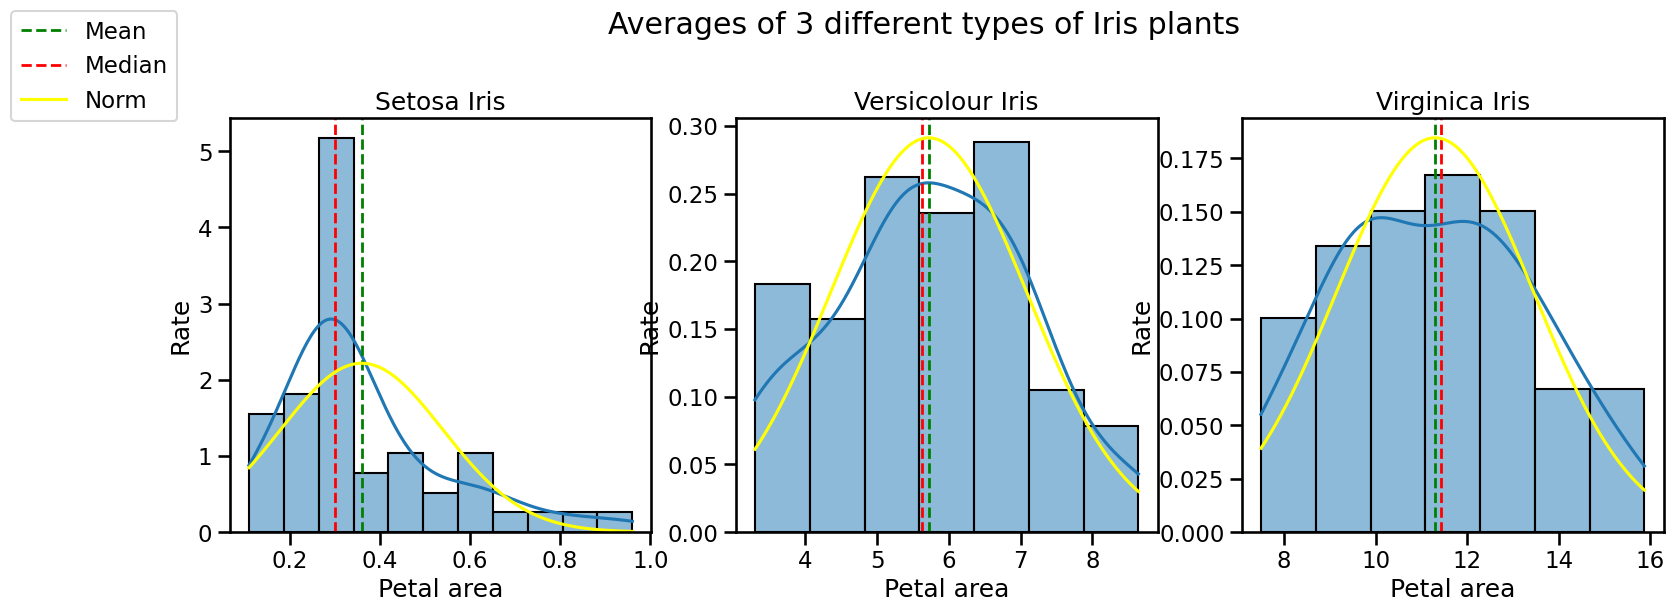

In [45]:
# plot on 3 different graphs median and mean of the petal area of each different varieties of Iris

fig, ax = plt.subplots(1,3, figsize= (18.5,6))

# setosa plot
sns.histplot(ax = ax[0], x = "petal_area", data=df_setosa, stat="density", kde=True)
sns.set_context("talk")
fig.subplots_adjust(top=.8)
fig.suptitle('Averages of 3 different types of Iris plants')

ax[0].set(title="Setosa Iris", xlabel= "Petal area", ylabel= "Rate")
ax[0].axvline(setosa_petal_area_mean, color="green", linestyle="--", linewidth=2, label="Mean")
ax[0].axvline(setosa_petal_area_median, color="red", linestyle="--", linewidth=2, label="Median")

setosa_x = np.linspace(0.11, 0.96, 1000)
setosa_y = norm.pdf(x= setosa_x , loc=setosa_petal_area_mean, scale=setosa_petal_area_stan_dev)
ax[0].plot(setosa_x,setosa_y, color="yellow", label="Norm")

# versicolor plot
sns.histplot(ax = ax[1], x= "petal_area", data=df_versicolor,stat="density", kde=True)
ax[1].set(title="Versicolour Iris", xlabel="Petal area", ylabel="Rate")
ax[1].axvline(versicolor_petal_area_mean, color="green", linestyle="--", linewidth=2)
ax[1].axvline(versicolor_petal_area_median, color="red", linestyle="--", linewidth=2)

versicolor_x = np.linspace(3.3, 8.64, 1000)
versicolor_y = norm.pdf(x= versicolor_x , loc=versicolor_petal_area_mean, scale=versicolor_petal_area_stan_dev)
ax[1].plot(versicolor_x,versicolor_y, color="yellow")

# virginica plot
sns.histplot(ax = ax[2], x= "petal_area", data=df_virginica, stat="density",kde=True)
ax[2].set(title="Virginica Iris", xlabel="Petal area", ylabel="Rate")
ax[2].axvline(virginica_petal_area_mean, color="green", linestyle="--", linewidth=2)
ax[2].axvline(virginica_petal_area_median, color="red", linestyle="--", linewidth=2)

virginica_x = np.linspace(7.5, 15.87, 1000)
virginica_y = norm.pdf(x= virginica_x , loc=virginica_petal_area_mean, scale=virginica_petal_area_stan_dev)
ax[2].plot(virginica_x,virginica_y, color="yellow")

fig.legend(loc="upper left")
plt.show()